In [5]:
#Matt
#install.packages("RCurl")
library(RCurl)
library(tidyverse, warn.conflicts = FALSE)
library(lubridate, warn.conflicts = FALSE)

#Jensen
library(xml2)
library(rvest)
library(httr)
#install.packages("readxl")
library(readxl)
#install.packages("furrr")
library(furrr)
future::plan(multicore)

#Sujung


Loading required package: future



## Webscrape river flows
Matt

In [40]:
opuha_url <- "https://hydrowebportal.niwa.co.nz/Export/BulkExport?DateRange=Custom&StartTime=2015-01-01%2000%3A00&EndTime=2020-12-31%2000%3A00&TimeZone=12&Calendar=CALENDARYEAR&Interval=Monthly&Step=1&ExportFormat=csv&TimeAligned=True&RoundData=False&IncludeGradeCodes=False&IncludeApprovalLevels=False&IncludeInterpolationTypes=False&Datasets[0].DatasetName=Discharge%20Value.NRWQN%40TK3&Datasets[0].Calculation=Aggregate&Datasets[0].UnitId=140"
rakaia_url <- "https://hydrowebportal.niwa.co.nz/Export/BulkExport?DateRange=Custom&StartTime=2015-01-01%2000%3A00&EndTime=2020-12-31%2000%3A00&TimeZone=12&Calendar=CALENDARYEAR&Interval=Monthly&Step=1&ExportFormat=csv&TimeAligned=True&RoundData=False&IncludeGradeCodes=False&IncludeApprovalLevels=False&IncludeInterpolationTypes=False&Datasets[0].DatasetName=Discharge.Master%4068526&Datasets[0].Calculation=Instantaneous&Datasets[0].UnitId=140"
waitaki_url <- "https://hydrowebportal.niwa.co.nz/Export/BulkExport?DateRange=Custom&StartTime=2015-01-01%2000%3A00&EndTime=2020-12-31%2000%3A00&TimeZone=12&Calendar=CALENDARYEAR&Interval=PointsAsRecorded&Step=1&ExportFormat=csv&TimeAligned=True&RoundData=False&IncludeGradeCodes=False&IncludeApprovalLevels=False&IncludeInterpolationTypes=False&Datasets[0].DatasetName=Discharge%20Value.NRWQN%40TK6&Datasets[0].Calculation=Instantaneous&Datasets[0].UnitId=140"
kawarau_url <- "https://hydrowebportal.niwa.co.nz/Export/BulkExport?DateRange=Custom&StartTime=2015-01-01%2000%3A00&EndTime=2020-12-31%2000%3A00&TimeZone=12&Calendar=CALENDARYEAR&Interval=PointsAsRecorded&Step=1&ExportFormat=csv&TimeAligned=True&RoundData=False&IncludeGradeCodes=False&IncludeApprovalLevels=False&IncludeInterpolationTypes=False&Datasets[0].DatasetName=Discharge%20Value.NRWQN%40AX2&Datasets[0].Calculation=Instantaneous&Datasets[0].UnitId=140"
clutha_url <- "https://hydrowebportal.niwa.co.nz/Export/BulkExport?DateRange=Custom&StartTime=2015-01-01%2000%3A00&EndTime=2020-12-31%2000%3A00&TimeZone=12&Calendar=CALENDARYEAR&Interval=Monthly&Step=1&ExportFormat=csv&TimeAligned=True&RoundData=False&IncludeGradeCodes=False&IncludeApprovalLevels=False&IncludeInterpolationTypes=False&Datasets[0].DatasetName=Discharge.Master%4075207&Datasets[0].Calculation=Instantaneous&Datasets[0].UnitId=140"
mataura_url <- "https://hydrowebportal.niwa.co.nz/Export/BulkExport?DateRange=Custom&StartTime=2015-01-01%2000%3A00&EndTime=2020-12-31%2000%3A00&TimeZone=12&Calendar=CALENDARYEAR&Interval=PointsAsRecorded&Step=1&ExportFormat=csv&TimeAligned=True&RoundData=False&IncludeGradeCodes=False&IncludeApprovalLevels=False&IncludeInterpolationTypes=False&Datasets[0].DatasetName=Discharge%20Value.NRWQN%40DN5&Datasets[0].Calculation=Instantaneous&Datasets[0].UnitId=140"

In [153]:
#Matt

row_calc1 <- function(tibble){
    n = as.integer(nrow(tibble))
    data <- tail(tibble, (n-4))
    names(data) <- c('Time','Value(m^3/s)')
    return(data)
}

row_calc2 <- function(tibble){
    n = as.integer(nrow(tibble))
    data <- tail(tibble, (n-4)) %>% select(-X) 
    names(data) <- c('Time','Value(m^3/s)')
    return(data)  
}
 
convert_to_date <- function(tibble) {
    converted <- separate(tibble, Time, c("date", "time"), " ")  %>% mutate(date = as.Date(date))
    return(converted)
}
opuha <- opuha_url %>% read.csv() %>% as_tibble() %>% row_calc2() %>% convert_to_date()
"Opuha checkpoint"

rakaia <- rakaia_url %>% read.csv() %>% as_tibble() %>% row_calc2() %>% convert_to_date()
rakaia_name <- rep("rakaia", times=nrow(rakaia))
rakaia_station <- rep("highbank", times=nrow(rakaia))
rakaia$river <- rakaia_name
rakaia$Gen_Code <- rakaia_station
"Rakaia checkpoint"

waitaki <- waitaki_url %>% read.csv() %>% as_tibble() %>% row_calc1() %>% convert_to_date()
waitaki_name <- rep("waitaki", times=nrow(waitaki))
waitaki_station <- rep("waitaki", times=nrow(waitaki))
waitaki$river <- waitaki_name
waitaki$Gen_Code <- waitaki_station
"Waitaki checkpoint"

kawarau <- kawarau_url %>% read.csv() %>% as_tibble() %>% row_calc1() %>% convert_to_date()                                  
"Kawarau checkpoint"

clutha <- clutha_url %>% read.csv() %>% as_tibble() %>% row_calc2() %>% convert_to_date()   
clutha_name <- rep("clutha", times=nrow(clutha))
clutha_station <- rep("clyde", times=nrow(clutha))
clutha$river <- clutha_name
clutha$Gen_Code <- clutha_station
"Clutha checkpoint"

mataura <- mataura_url %>% read.csv() %>% as_tibble() %>% row_calc1() %>% convert_to_date()
"Mataura checkpoint"
#empty data sets, monowai <- read.csv(text = getURL("https://hydrowebportal.niwa.co.nz/Export/BulkExport?DateRange=Custom&StartTime=2020-01-01%2000%3A00&EndTime=2020-12-31%2000%3A00&TimeZone=12&Calendar=CALENDARYEAR&Interval=PointsAsRecorded&Step=1&ExportFormat=csv&TimeAligned=True&RoundData=False&IncludeGradeCodes=False&IncludeApprovalLevels=False&IncludeInterpolationTypes=False&Datasets[0].DatasetName=Discharge%20Value.NRWQN%40DN10&Datasets[0].Calculation=Instantaneous&Datasets[0].UnitId=140"))                    
#taieri <- read.csv(text = getURL("https://hydrowebportal.niwa.co.nz/Export/BulkExport?DateRange=Custom&StartTime=2020-01-01%2000%3A00&EndTime=2020-12-31%2000%3A00&TimeZone=12&Calendar=CALENDARYEAR&Interval=PointsAsRecorded&Step=1&ExportFormat=csv&TimeAligned=True&RoundData=False&IncludeGradeCodes=False&IncludeApprovalLevels=False&IncludeInterpolationTypes=False&Datasets[0].DatasetName=Discharge%20Value.NRWQN%40DN3&Datasets[0].Calculation=Instantaneous&Datasets[0].UnitId=140"))

## Concatenating all relevant rivers
river_data <- bind_rows(rakaia, waitaki, clutha) %>% 
                rename(cumecs="Value(m^3/s)") %>% 
                mutate(cumecs=as.double(cumecs))

[1] "Opuha checkpoint"

[1] "Rakaia checkpoint"

[1] "Waitaki checkpoint"

[1] "Kawarau checkpoint"

[1] "Clutha checkpoint"

[1] "Mataura checkpoint"

In [154]:
river_data

date,time,cumecs,river,Gen_Code
<date>,<chr>,<dbl>,<chr>,<chr>
2015-01-01,00:00:00,145.56822,rakaia,highbank
2015-02-01,00:00:00,114.97612,rakaia,highbank
2015-03-01,00:00:00,98.51507,rakaia,highbank
2015-04-01,00:00:00,260.14434,rakaia,highbank
2015-05-01,00:00:00,139.35321,rakaia,highbank
2015-06-01,00:00:00,158.66876,rakaia,highbank
2015-07-01,00:00:00,141.94014,rakaia,highbank
2015-08-01,00:00:00,148.16512,rakaia,highbank
2015-09-01,00:00:00,128.41403,rakaia,highbank


## Webscrape hydro stations power output
Jensen

### Information variables

In [6]:
# Main site address
main_url <- "https://www.emi.ea.govt.nz"
# Sub address for electricity generation information
power_url <- "/Wholesale/Datasets/Generation/Generation_MD"
# Sub address for hydrostations fleet
stations_url <- "/Wholesale/Datasets/Generation/Generation_fleet/Existing"
# Sub address for network supply points
points_url <- "/Wholesale/Reports/R_NSPL_DR?_si=v|3"

### Retrieve generation output data

In [7]:
# Acquire html code from sub address
source <- paste(main_url, power_url, sep="") %>% read_html()
"Source checkpoint"
# Identify all links in the given html class
all_links <- source %>% html_nodes(".table") %>% html_elements("a") %>% html_attr("href")
"Links identification checkpoint"
# Identify appropriate urls within links and remove duplicates
filtered_links <- all_links[startsWith(all_links, power_url) & !duplicated(all_links)]
"Links filtered checkpoint"
# Extract date information from filtered links
start_pos <- nchar(power_url) + 2
dates <- substring(filtered_links , start_pos, start_pos + 3) 
"Date extraction checkpoint"
# Set dates wanted
dates_wanted <- seq(from=2015,to=2020)
# Select links containing csv data
selected_links <- filtered_links[dates %in% dates_wanted]
"Links selected checkpoint"
# Extract csv data into dataframes
link <- paste(main_url, selected_links, sep="") 
generation_md <- link %>% future_map_dfr(read_csv, show_col_types = FALSE)
"Generation retrieval checkpoint"

# Filter out non hydro stations
generation_md_hydro <- generation_md %>% filter(Tech_Code == "Hydro")
"Data filter checkpoint"
"RETRIEVAL COMPLETE"

[1] "Source checkpoint"

[1] "Links identification checkpoint"

[1] "Links filtered checkpoint"

[1] "Date extraction checkpoint"

[1] "Links selected checkpoint"

[1] "Generation retrieval checkpoint"

[1] "Data filter checkpoint"

[1] "RETRIEVAL COMPLETE"

In [ ]:
#Sujung

## River flows and hydrostations power output combination

In [159]:

## Hydrostations -> rivers
# waitaki -> Waitaki
# highbank -> Rakaia
# clyde -> Clutha
matching_gen_codes <- c("clyde", "highbank", "waitaki")
generation_by_river <- generation_md_hydro %>% filter(Gen_Code %in% matching_gen_codes) %>% 
                            rename(date=Trading_date) %>% 
                            subset(select = -c(TP49, TP50)) %>%
                            merge(river_data, by=c("Gen_Code", "date"))
generation_by_river$average_power <- generation_by_river %>% select(c(8:55)) %>% rowMeans()
generation_by_river

Gen_Code,date,Site_Code,POC_Code,Nwk_Code,Fuel_Code,Tech_Code,TP1,TP2,TP3,⋯,TP43,TP44,TP45,TP46,TP47,TP48,time,cumecs,river,average_power
<chr>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
clyde,2015-01-01,CYD,CYD2201,CTCT,Hydro,Hydro,103730,103510,103480,⋯,152480,150030,105600,102420,102520,102490,00:00:00,491.5415,clutha,134180.21
clyde,2015-02-01,CYD,CYD2201,CTCT,Hydro,Hydro,107080,102940,102510,⋯,108330,102650,102530,102480,102530,55000,00:00:00,519.5486,clutha,122161.25
clyde,2015-03-01,CYD,CYD2201,CTCT,Hydro,Hydro,101788,52557,51547,⋯,105016,101598,100875,101548,56054,52266,00:00:00,349.7788,clutha,88743.27
clyde,2015-04-01,CYD,CYD2201,CTCT,Hydro,Hydro,51072,53238,47742,⋯,103027,103097,103728,53082,51252,50930,00:00:00,741.6083,clutha,83302.08
clyde,2015-05-01,CYD,CYD2201,CTCT,Hydro,Hydro,109055,109761,106047,⋯,165327,165677,165571,164442,165502,108290,00:00:00,668.5790,clutha,144296.92
clyde,2015-06-01,CYD,CYD2201,CTCT,Hydro,Hydro,167464,162396,119000,⋯,165757,168927,146712,133132,135096,128623,00:00:00,860.7566,clutha,154184.17
clyde,2015-07-01,CYD,CYD2201,CTCT,Hydro,Hydro,147852,101347,103777,⋯,174976,174220,176918,170085,174279,173989,00:00:00,694.8239,clutha,150566.52
clyde,2015-08-01,CYD,CYD2201,CTCT,Hydro,Hydro,100544,52662,50562,⋯,102456,102250,100145,100040,55513,52610,00:00:00,641.3159,clutha,92517.56
clyde,2015-09-01,CYD,CYD2201,CTCT,Hydro,Hydro,56412,52863,55792,⋯,104440,100947,101171,101937,102563,102415,00:00:00,411.7504,clutha,122511.83


`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



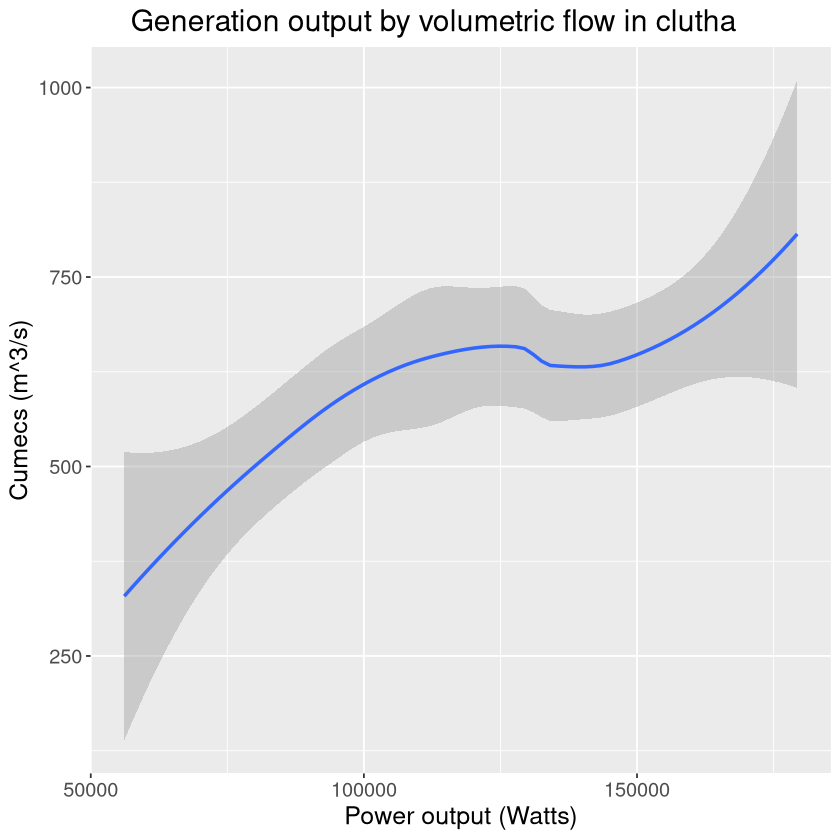

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



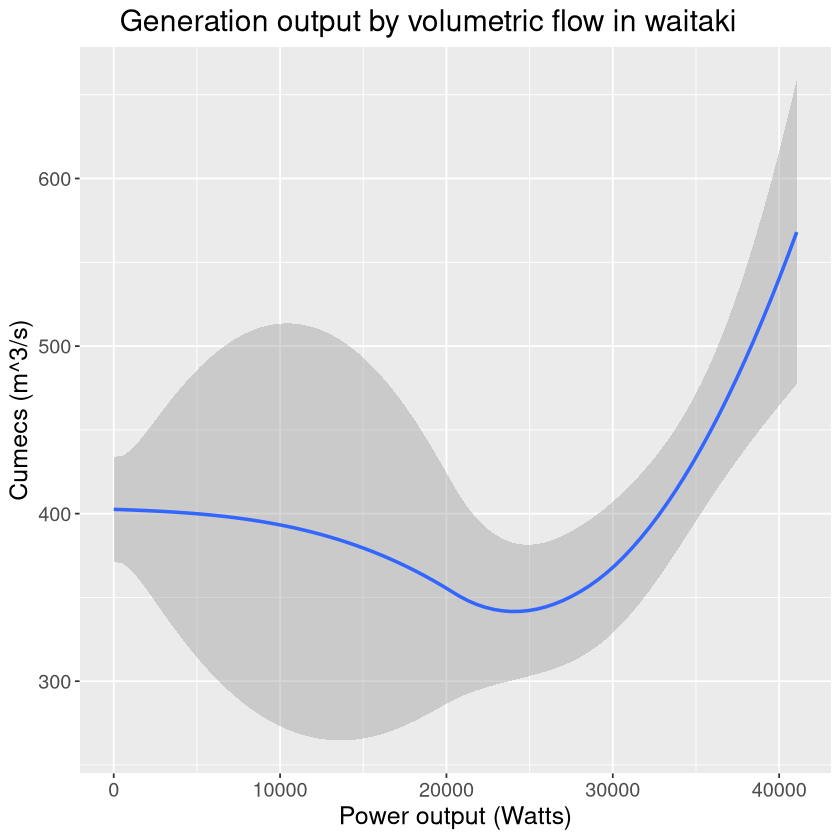

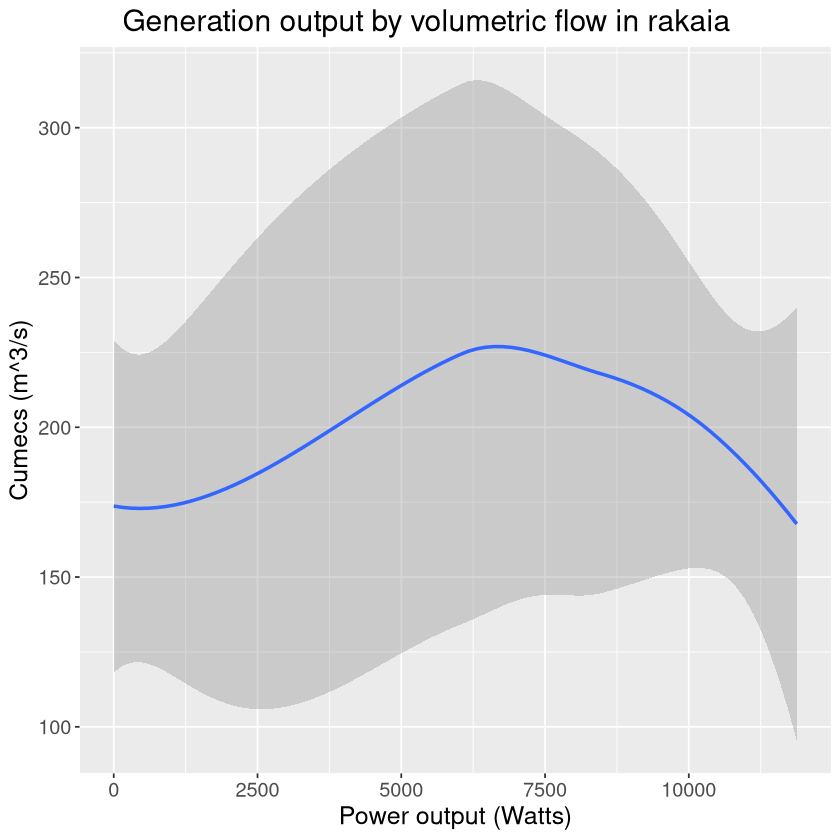

In [181]:
plot_river_generation <- function(data, river_name) {
    graph_title <- paste("Generation output by volumetric flow in", river_name)
    plot <- data %>% filter(river == river_name) %>% ggplot(mapping = aes(x = average_power, y = cumecs)) + 
                                                        labs(title = graph_title) +
                                                        theme(text = element_text(size=15),
                                                              plot.title = element_text(hjust=0.3)) + 
                                                        scale_x_continuous(name = "Power output (Watts)") +
                                                        scale_y_continuous(name = "Cumecs (m^3/s)") +
                                                        geom_smooth()
    return(plot)
}
generation_by_river %>% plot_river_generation("clutha")
generation_by_river %>% plot_river_generation("waitaki")
generation_by_river %>% plot_river_generation("rakaia")